# 0. Review
## 0.A Scikit-Learn

Scikit-Learn is a machine learning python package. It allows users to access machine learning algorithms via **object-oriented programming**.

## 0.B Data Set

I will be using a dataset of antibiotic resistance in bacteria strains. 

- Each bacteria is labeled with its resistance to the antibiotic, azithromycin.
- Additionally, each bacteria sample is labelled if its genome contains certain strands of DNA.

We would like to learn antibiotic resistance from the bacterial genome. 

- Our predictors are whether strands of DNA are present.
- Our response are resistance classes.

First, we have to clean our data up. **This section will focus on data preprocessing.**


## 0.C Data Preprocessing

We did a bit of data preprocessing: 

- encoded the resistance feature as 0 - "resistant," 1 - "susceptible".
- encoded all features of the DNA strands as, 0 - "if its genome does not contain the strand of DNA", 1 - "if its genome contains the strand of DNA."
- standardized dataset of presence of DNA strands

## 0.D Load Data
Now, we load our dataset. Run the code below to load 

- the dataset, ```antibiotic_resistance_all_labels```, containing antibotic resistance phentype for each bacteria
- the dataset, ```standardized_DNA_data_df```, containing standardized antibotic resistance phentype for each bacteria
- and dataset, ```DNA_slices_all_df```, containing the genome of each bacteria 

In [1]:
import pandas as pd

antibiotic_resistance_all_labels = pd.read_csv('datasets/antibiotic_resistance_encoded_labels',index_col=0)
DNA_slices_all_df = pd.read_csv('datasets/DNA_slices_encoded_csv',index_col=0)

In [2]:
#create standardized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_DNA_data = scaler.fit_transform(DNA_slices_all_df)
standardized_DNA_data_df = pd.DataFrame(standardized_DNA_data,
                                        columns=DNA_slices_all_df.columns,
                                        index=DNA_slices_all_df.index)

**In this section, we will be covering unsupervised learning.**

Recall that **unsupervised learning** is extracting structure from data (self-organized learning - find previously unknown patterns in data set without pre-existing labels).

# 7. Dimensionality Reduction: PCA

It is difficult to visualize data with many features. The human mind is mostly limited to three dimensions. 

One popular technique of reducing dimensions and grouping features together is PCA.

PCA attempts to project high dimensional data onto directions of highest variance of the data
For each variable, normalizing subtracts the minimium value and divides by the difference between the maximum and minimum. 


## 7.A PCA for data with two features
### 7.B.1 Reduction to one dimension

<img src="images/07_PCA_01.png" alt="Drawing" style="width: 1000px;"/>


## 7.B PCA for data with three features

### 7.B.1 Reduction to one dimension

<img src="images/07_PCA_03.png" alt="Drawing" style="width: 1000px;"/>

### 7.B.2 Reduction to two dimensions

<img src="images/07_PCA_04.png" alt="Drawing" style="width: 1000px;"/>


## 7.C PCA on the DNA slices dataframe

```DNA_slices_all_df``` is very high dimensional. To get some idea of what the data looks like, we will use PCA to project the data into two dimensions.

### I. Initialize ```PCA``` object

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

### II. Fit PCA object

In [4]:
pca.fit(standardized_DNA_data_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### III. Transform Data

In [5]:
transformed_data = pca.fit_transform(standardized_DNA_data_df)

###  IV. Plot reduced data

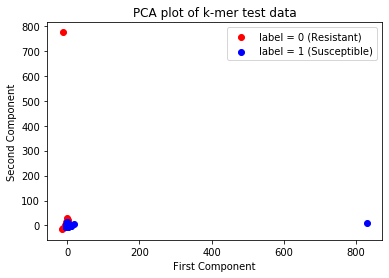

In [6]:
import matplotlib.pyplot as plt


#plot suspectible strains
plt.figure(figsize=(10,6))
%matplotlib inline
presence_0 = [element == 0 for element in antibiotic_resistance_all_labels.values.ravel()]

plt.scatter(transformed_data[presence_0, 0],
            transformed_data[presence_0, 1],
            label='label = 0 (Resistant)',
            c='r')

#plot resistant strains

presence_1 = [element == 1 for element in antibiotic_resistance_all_labels.values.ravel()]

plt.scatter(transformed_data[presence_1, 0],
            transformed_data[presence_1, 1],
            label='label = 1 (Susceptible)',
            c='b')


plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PCA plot of k-mer test data')
plt.legend()
plt.show()

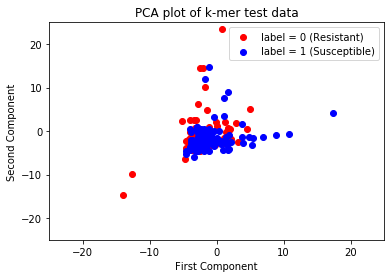

In [7]:
import matplotlib.pyplot as plt


#plot suspectible strains
plt.figure(figsize=(10,6))
%matplotlib inline
presence_0 = [element == 0 for element in antibiotic_resistance_all_labels.values.ravel()]

plt.scatter(transformed_data[presence_0, 0],
            transformed_data[presence_0, 1],
            label='label = 0 (Resistant)',
            c='r')

#plot resistant strains

presence_1 = [element == 1 for element in antibiotic_resistance_all_labels.values.ravel()]

plt.scatter(transformed_data[presence_1, 0],
            transformed_data[presence_1, 1],
            label='label = 1 (Susceptible)',
            c='b')

plt.xlim([-25,25])
plt.ylim([-25,25])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PCA plot of k-mer test data')
plt.legend()
plt.show()

## 7.C.2 Exercise: Reduction to 3-D

We can also reduce the data to three dimensions using PCA. We need three components to reduce three dimensions. 

Following the steps above, redo the PCA to reduce the data to three dimensions. Use ```transformed_3d``` to store your final transformed data.

In [21]:
# enter solution here
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
transformed_3d = pca.fit_transform(standardized_DNA_data_df)

<IPython.core.display.Javascript object>


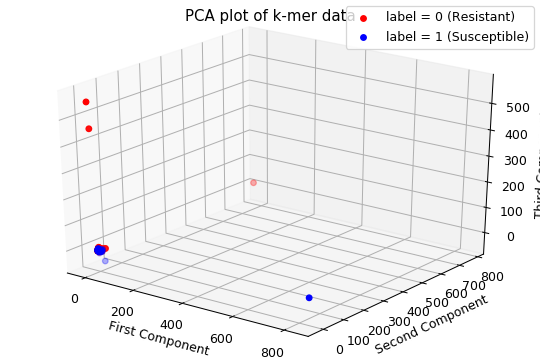

In [24]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib notebook

fig =  plt.figure()
ax = Axes3D(fig)


#plot suspectible strains

presence_0 = [element == 0 for element in antibiotic_resistance_all_labels.values.ravel()]

ax.scatter(transformed_3d[presence_0, 0],
           transformed_3d[presence_0, 1],
           transformed_3d[presence_0, 2],
           label='label = 0 (Resistant)',
           c='r')

#plot resistant strains

presence_1 = [element == 1 for element in antibiotic_resistance_all_labels.values.ravel()]

ax.scatter(transformed_3d[presence_1, 0],
           transformed_3d[presence_1, 1],
           transformed_3d[presence_1, 2],
           label='label = 1 (Susceptible)',
           c='b')

ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.title('PCA plot of k-mer data')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


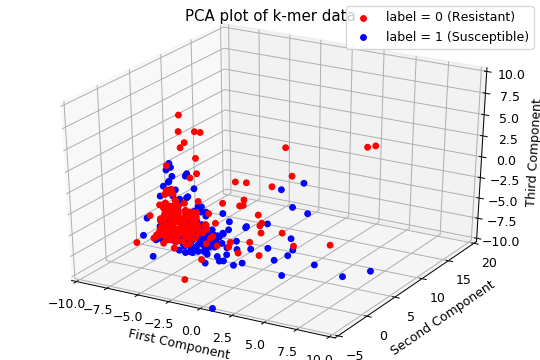

In [23]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib notebook

fig =  plt.figure()
ax = Axes3D(fig)


#plot suspectible strains

presence_0 = [element == 0 for element in antibiotic_resistance_all_labels.values.ravel()]

ax.scatter(transformed_3d[presence_0, 0],
           transformed_3d[presence_0, 1],
           transformed_3d[presence_0, 2],
           label='label = 0 (Resistant)',
           c='r')

#plot resistant strains

presence_1 = [element == 1 for element in antibiotic_resistance_all_labels.values.ravel()]

ax.scatter(transformed_3d[presence_1, 0],
           transformed_3d[presence_1, 1],
           transformed_3d[presence_1, 2],
           label='label = 1 (Susceptible)',
           c='b')

ax.set_xlim([-10,10])
ax.set_ylim([-5,20])
ax.set_zlim([-10,10])
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.title('PCA plot of k-mer data')
plt.legend()
plt.show()

## 7.C.3 PCA: Explained Variance

```PCA``` also calculates the variance in each direction. This is a measure of the information of a direction.

To compare variance in each direction, it's common to analyze the explained variance ratio rather than the explained variance. Explained variance ratio is the explained variance in the each direction divided by the total variance in the data. The explained variance ratio is a measure of the "information" captured in each direction. 

```PCA``` stores explained variance as ```explained_variance_```. It also stores the explained variance ratio as ```explained_variance_ratio_```.

In [11]:
# learn the three dimensional PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
transformed_3d = pca.fit_transform(standardized_DNA_data_df)

I calculate the explained variance below.

In [12]:
#get explained variance
explained_variance = pca.explained_variance_
explained_variance

array([1771.8833212 , 1550.07072333, 1381.20268049])

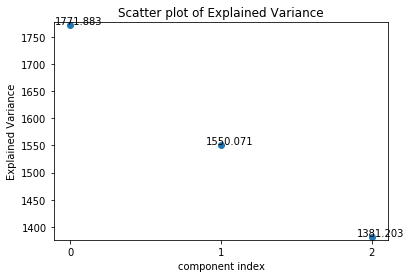

In [13]:
n = len(explained_variance)

x = range(0,n)

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x,explained_variance)
ax.set_ylim(min(explained_variance)- 5,max(explained_variance)+ 5)
for i in x:
    ax.annotate("%.3f" %explained_variance[i],
                (i, explained_variance[i]), 
                (i-0.1, explained_variance[i]+2))
ax.set_xlabel('component index')
ax.set_ylabel('Explained Variance')
ax.set_title('Scatter plot of Explained Variance')
ax.set_xticks(range(0, n, 1))

plt.show()

I calculate and plot the explained variance ratio below.

In [14]:
#get explained variance
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.02420515, 0.02117504, 0.01886818])

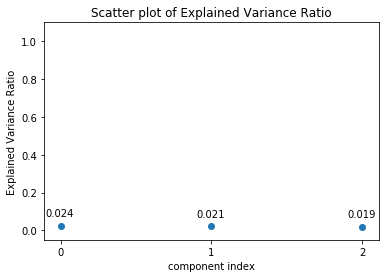

In [15]:
n = len(explained_variance_ratio)

x = range(0,n)

fig, ax = plt.subplots()
ax.scatter(x,explained_variance_ratio)
ax.set_ylim([-0.05,1.10])
for i in x:
    ax.annotate("%.3f" %explained_variance_ratio[i],
                (i, explained_variance_ratio[i]), 
                (i-0.1, explained_variance_ratio[i]+0.05))
ax.set_xlabel('component index')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scatter plot of Explained Variance Ratio')
ax.set_xticks(range(0, n, 1))

plt.show()

## 7.C.2 Exercise: The Drop-off 

When reducing the data, there is a loss in variance (and thus information). Typically if there significant drop-off in the explained variance, as in the plot below,

<img src="images/07_PCA_drop_off_.png" alt="Drawing" style="width: 500px;"/>

many researchers have argued that it is possible to cut off lower variance components without much information.

Play around with the number of components and determine if it is possible to find a drop-off in the explained variance. Please store your instance of ```PCA``` as ```pca```.

In [16]:
#enter solution here

from sklearn.decomposition import PCA
pca = PCA(whiten=True)
_ = pca.fit_transform(standardized_DNA_data_df)

In [17]:
explained_variance = pca.explained_variance_
explained_variance

array([1.77188480e+03, 1.55007313e+03, 1.38122295e+03, 1.25455878e+03,
       1.06552100e+03, 9.73761134e+02, 9.72482466e+02, 8.42107940e+02,
       7.47318352e+02, 7.24274440e+02, 6.90228294e+02, 6.71079168e+02,
       6.48922757e+02, 6.40424167e+02, 6.34086627e+02, 6.20571969e+02,
       6.11736097e+02, 6.06701463e+02, 5.98696085e+02, 5.76109460e+02,
       5.51225991e+02, 5.31555988e+02, 5.21376552e+02, 5.01776586e+02,
       4.93160824e+02, 4.85858581e+02, 4.80547175e+02, 4.69258246e+02,
       4.66302419e+02, 4.49047297e+02, 4.38842104e+02, 4.31787731e+02,
       4.25662357e+02, 4.22552686e+02, 4.16296811e+02, 4.09652479e+02,
       4.09302761e+02, 4.01312429e+02, 3.96327564e+02, 3.88139695e+02,
       3.88084123e+02, 3.83992932e+02, 3.77104476e+02, 3.75645803e+02,
       3.74875681e+02, 3.66178563e+02, 3.62525177e+02, 3.58485384e+02,
       3.56159566e+02, 3.54692024e+02, 3.53862042e+02, 3.49939652e+02,
       3.44728455e+02, 3.43854452e+02, 3.38985501e+02, 3.37687555e+02,
      

In [18]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([2.42051699e-02, 2.11750693e-02, 1.88684593e-02, 1.71381392e-02,
       1.45557526e-02, 1.33022495e-02, 1.32847820e-02, 1.15037760e-02,
       1.02088847e-02, 9.89408899e-03, 9.42899511e-03, 9.16740484e-03,
       8.86473296e-03, 8.74863635e-03, 8.66206117e-03, 8.47744162e-03,
       8.35673751e-03, 8.28796093e-03, 8.17860194e-03, 7.87005305e-03,
       7.53012768e-03, 7.26142186e-03, 7.12236372e-03, 6.85461466e-03,
       6.73691740e-03, 6.63716372e-03, 6.56460624e-03, 6.41039168e-03,
       6.37001304e-03, 6.13429615e-03, 5.99488618e-03, 5.89851856e-03,
       5.81484172e-03, 5.77236147e-03, 5.68690190e-03, 5.59613574e-03,
       5.59135834e-03, 5.48220490e-03, 5.41410820e-03, 5.30225626e-03,
       5.30149710e-03, 5.24560860e-03, 5.15150755e-03, 5.13158106e-03,
       5.12106067e-03, 5.00225203e-03, 4.95234425e-03, 4.89715788e-03,
       4.86538562e-03, 4.84533797e-03, 4.83399985e-03, 4.78041729e-03,
       4.70922873e-03, 4.69728926e-03, 4.63077602e-03, 4.61304519e-03,
      

In [19]:
# first 245 columns contain 90% of the variance. Alot less than 245
sum(explained_variance_ratio[:245])

0.9056249015018761

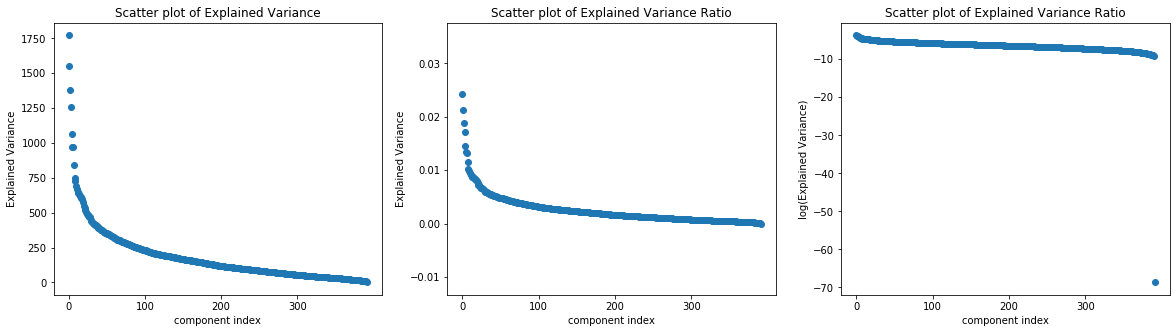

In [20]:
n = len(explained_variance_ratio)

x = range(0,n)

fig, ax = plt.subplots(1,3)

fig.set_size_inches(20, 5)

ax[0].scatter(x,explained_variance)

ax[0].set_xlabel('component index')
ax[0].set_ylabel('Explained Variance')
ax[0].set_title('Scatter plot of Explained Variance')
ax[0].set_xticks(range(0, n, 100))

ax[1].scatter(x,explained_variance_ratio)
ax[1].set_xlabel('component index')
ax[1].set_ylabel('Explained Variance')
ax[1].set_title('Scatter plot of Explained Variance Ratio')
ax[1].set_xticks(range(0, n, 100))

import numpy as np
ax[2].scatter(x,np.log(explained_variance_ratio))
ax[2].set_xlabel('component index')
ax[2].set_ylabel('log(Explained Variance)')
ax[2].set_title('Scatter plot of Explained Variance Ratio')
ax[2].set_xticks(range(0, n, 100))

plt.show()